In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.rcParams['figure.figsize'] = (8, 8)
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('data_cleaned.csv')
df

,Unnamed: 0,id,genre,box_office,theater_date,review_percent
0,0,3,Drama,600000,2012-08-17,63
1,0,3,Science Fiction and Fantasy,600000,2012-08-17,63
2,1,10,Comedy,41032915,2002-01-11,46
3,2,13,Drama,224114,2006-04-27,64
4,3,14,Drama,134904,2010-06-30,14
...,...,...,...,...,...,...
628,294,1986,Comedy,794306,2002-08-30,97
629,294,1986,Drama,794306,2002-08-30,97
630,295,1996,Action and Adventure,33886034,2006-08-18,67
631,295,1996,Horror,33886034,2006-08-18,67


In [3]:
df = df.drop('Unnamed: 0', axis = 1)
df = df.sort_values(by = "theater_date")
df

,id,genre,box_office,theater_date,review_percent
456,1486,Romance,109257,1958-06-24,90
454,1486,Drama,109257,1958-06-24,90
453,1486,Art House and International,109257,1958-06-24,90
455,1486,Mystery and Suspense,109257,1958-06-24,90
259,884,Drama,8300,1974-12-25,28
...,...,...,...,...,...
221,782,Drama,52000189,2017-12-01,91
220,782,Comedy,52000189,2017-12-01,91
168,567,Comedy,104880310,2017-12-22,27
533,1682,Drama,35003216,2018-02-09,23


In [4]:
df.groupby(["genre"])["review_percent"].mean()

genre
Action and Adventure           51.014706
Animation                      53.388889
Art House and International    74.642857
Classics                       28.000000
Comedy                         49.219512
Documentary                    77.400000
Drama                          57.704545
Faith and Spirituality         30.666667
Horror                         39.125000
Kids and Family                47.642857
Musical and Performing Arts    54.800000
Mystery and Suspense           56.425926
Romance                        57.600000
Science Fiction and Fantasy    50.185185
Special Interest               61.000000
Sports and Fitness             72.000000
Television                     42.000000
Western                        50.333333
Name: review_percent, dtype: float64

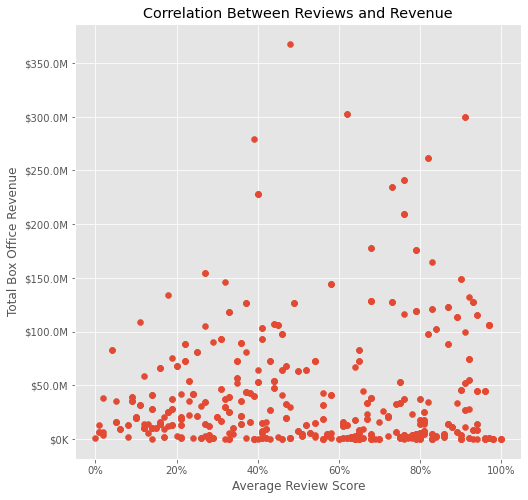

In [5]:
x = df["review_percent"]
y = df["box_office"]
fig, ax = plt.subplots()

def currency(x, pos):
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

ax.set_xlabel("Average Review Score")
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("Total Box Office Revenue")
ax.yaxis.set_major_formatter(currency)
ax.set_title("Correlation Between Reviews and Revenue")

plt.scatter(x,y);

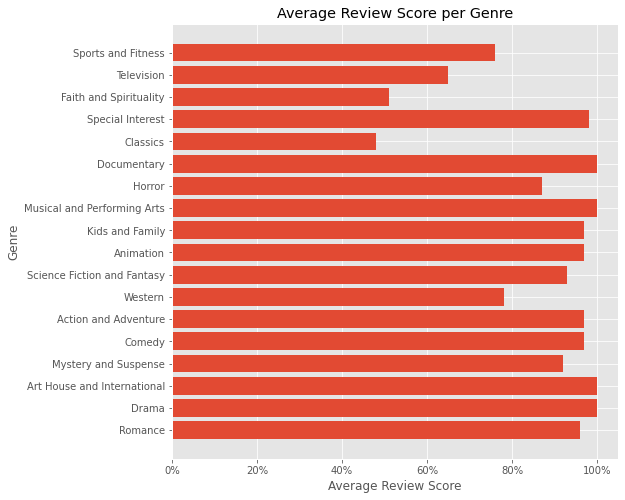

In [6]:
z = df["genre"]
fig, ax = plt.subplots()

ax.set_xlabel("Average Review Score")
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("Genre")
ax.set_title("Average Review Score per Genre")
plt.barh(z, x);

plt.savefig("reviewscore_genre.png")

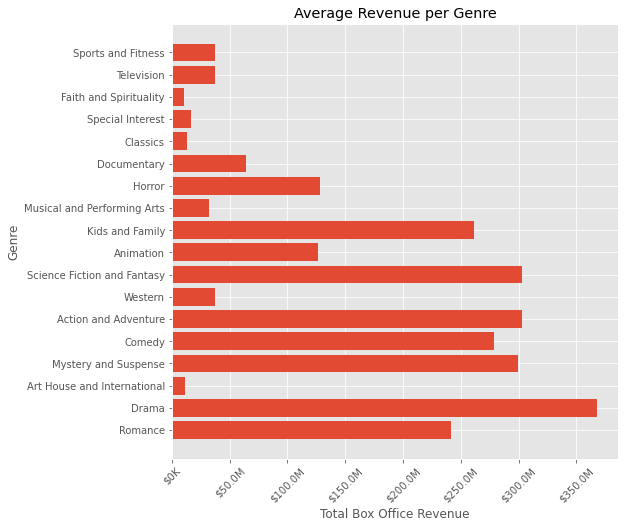

In [7]:
fig, ax = plt.subplots()


ax.set_xlabel("Total Box Office Revenue")
ax.xaxis.set_major_formatter(currency)
ax.tick_params(axis='x', labelrotation = 45)
ax.set_ylabel("Genre")
ax.set_title("Average Revenue per Genre")
plt.barh(z, y);

plt.savefig("revenue_genre.png")

In [ ]:
A = df["genre"]["Drama"]
B = df["genre"]["Mystery and Suspense"]
C = df["genre"]["Action & Adventure"]
D = df["genre"]["Science Fiction & Fantasy"]
i = df["theatre_date"]

fig, ax = subplots()

plt.plot(A, i)